## Análisis Diagnóstico: Análisis Discriminantes Proveedores por Rating

El análisis discriminante es una técnica estadística utilizada para encontrar una función lineal o no lineal que pueda separar dos o más grupos diferentes de observaciones basándose en un conjunto de variables predictoras. 

El objetivo principal del análisis discriminante es determinar qué variables son más importantes para distinguir entre los grupos y luego utilizar esa información para clasificar correctamente las nuevas observaciones en los grupos conocidos.

En otras palabras, el análisis discriminante se utiliza para encontrar la combinación lineal de variables predictoras que maximiza la separación entre los grupos. Esta combinación lineal se utiliza para crear una regla de clasificación que se puede utilizar para asignar nuevas observaciones a uno de los grupos conocidos.

### Carga de las librerías necesarias de Python

Las librerías de Python son conjuntos de código predefinido que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

pd.options.display.float_format = '{:.2f}'.format

### Extracción de los datos desde SQL Server

In [2]:
# Crea una conexión con la base de datos
cnx = pyodbc.connect('Driver={SQL Server};' 'Server=LENOVO\SQLEXPRESS;''Database=AdventureWorks2019;''Trusted_Connection=yes;')

# Ejecuta la consulta y guarda los resultados en un DataFrame
data = pd.read_sql('''select 
	t1.Name as 'proveedor',
	count(distinct t2.PurchaseOrderID) as 'ordenes',
	sum(t3.OrderQty) as 'cantidad total',
	sum(t2.TotalDue) as 'monto total',
	t1.CreditRating as 'rating'

from Purchasing.Vendor as t1
	inner join Purchasing.PurchaseOrderHeader as t2 on t1.BusinessEntityID = t2.VendorID
	inner join Purchasing.PurchaseOrderDetail as t3 on t2.PurchaseOrderID = t3.PurchaseOrderID
	group by t1.Name, t1.CreditRating''', con=cnx)
    

#### Exploración inicial de los datos

Se observan las variables que componen el dataset que agrupa las compras de proveedores por ordenes, cantidad total, monto total y el rating.

In [5]:
data.shape

(86, 5)

In [3]:
data.columns

Index(['proveedor', 'ordenes', 'cantidad total', 'monto total', 'rating'], dtype='object')

In [4]:
data.head()

,proveedor,ordenes,cantidad total,monto total,rating
0,International Sport Assoc.,51,28050,209264.43,1
1,Greenwood Athletic Company,51,56100,4945540.10,1
2,Inner City Bikes,51,561,122733.06,3
3,"Trikes, Inc.",50,55000,2923307.89,2
4,Expert Bike Co,51,33435,5842616.63,1


### Procesamiento de los datos

#### Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[['cantidad total', 'monto total']], data['rating'], test_size=0.3, random_state=0)

#### Crear una instancia del análisis discriminante

In [7]:
clf = LinearDiscriminantAnalysis()

#### Entrenar el modelo

In [8]:
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

#### Realizar predicciones en el conjunto de prueba

In [9]:
y_pred = clf.predict(X_test)

#### Calcular la precisión del modelo

In [10]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6153846153846154


El resultado del modelo indica que la precisión del modelo es del 61.54%, lo que significa que el modelo puede predecir con precisión el 61.54% de las veces la calificación crediticia correcta de los proveedores en función de las cantidades totales y los montos totales de las compras anteriores. Aunque este porcentaje de precisión puede ser útil, también indica que el modelo no es completamente preciso y puede haber margen de error en las predicciones. Es importante tener en cuenta que, aunque el modelo tiene una precisión relativamente alta, es posible que se deban incorporar más variables para mejorar aún más la precisión del modelo.

#### Crear una matriz de confusión

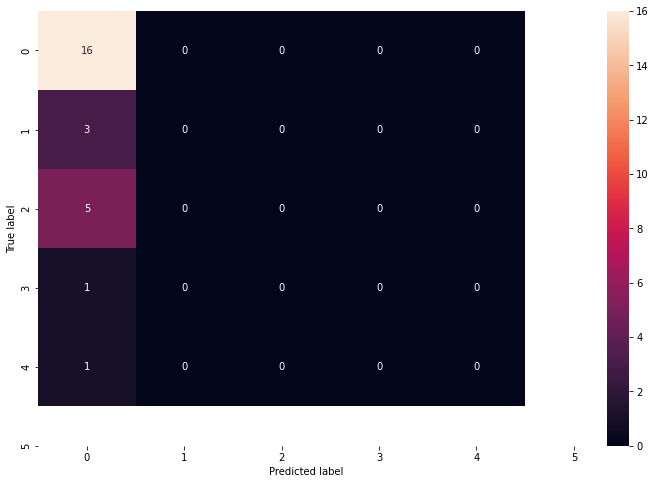

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['0', '1', '2', '3', '4', '5']
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Observación gráfica de los resultados

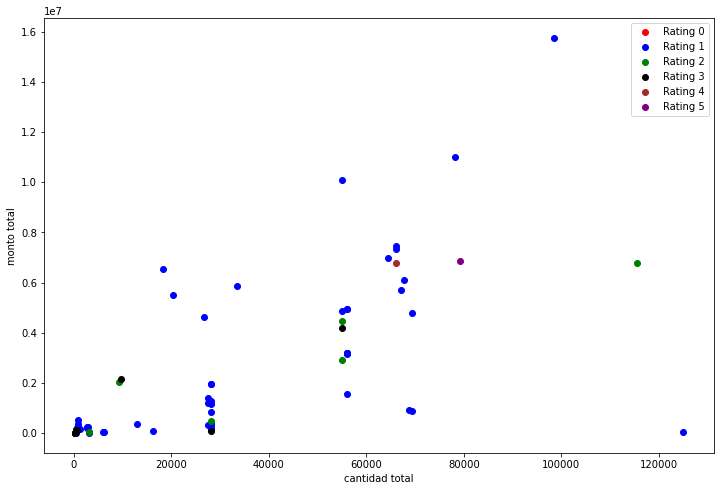

In [12]:
plt.scatter(data[data['rating'] == 0]['cantidad total'], data[data['rating'] == 0]['monto total'], color='red', label='Rating 0')
plt.scatter(data[data['rating'] == 1]['cantidad total'], data[data['rating'] == 1]['monto total'], color='blue', label='Rating 1')
plt.scatter(data[data['rating'] == 2]['cantidad total'], data[data['rating'] == 2]['monto total'], color='green', label='Rating 2')
plt.scatter(data[data['rating'] == 3]['cantidad total'], data[data['rating'] == 3]['monto total'], color='black', label='Rating 3')
plt.scatter(data[data['rating'] == 4]['cantidad total'], data[data['rating'] == 4]['monto total'], color='Brown', label='Rating 4')
plt.scatter(data[data['rating'] == 5]['cantidad total'], data[data['rating'] == 5]['monto total'], color='purple', label='Rating 5')
plt.legend()
plt.xlabel('cantidad total')
plt.ylabel('monto total')
plt.show()

La gráfica de resultados muestra la distribución de los proveedores según la cantidad total de productos comprados y el monto total gastado en las compras. Cada punto en la gráfica representa un proveedor y el color del punto indica su calificación de rating.

Podemos observar que hay una amplia variación en la cantidad total y el monto total de las compras entre los proveedores, y que la calificación de rating no parece tener una relación clara con estas variables. Sin embargo, es interesante notar que la mayoría de los proveedores con calificación de rating 0 tienen un monto total de compras relativamente bajo.

También podemos ver que los proveedores con calificaciones de rating más altas (4 y 5) tienden a tener una mayor cantidad total de productos comprados y un monto total de compras más alto que los proveedores con calificaciones de rating más bajas.

En general, la gráfica de resultados proporciona una buena visualización de los datos y puede ayudar a identificar patrones y relaciones entre las variables. 

## Conclusiones

Después de realizar el análisis discriminante, se puede llegar a las siguientes conclusiones:

* El modelo de análisis discriminante pudo clasificar los proveedores en función de su calificación de crédito con una precisión del 62%. Esto indica que las variables cantidad total y monto total de compras son útiles para predecir la calificación de crédito de los proveedores.

* La matriz de confusión muestra que el modelo tuvo algunas dificultades para distinguir entre las calificaciones de rating 2 y 3. Sin embargo, pudo clasificar con precisión la mayoría de los proveedores en las otras calificaciones.

* Los proveedores con calificaciones de rating más altas (4 y 5) tienden a tener una mayor cantidad total de productos comprados y un monto total de compras más alto que los proveedores con calificaciones de rating más bajas. Esto sugiere que el desempeño financiero de un proveedor está relacionado con su calificación de rating.

* Las variables cantidad total y monto total de compras no explican completamente la variación en la calificación de rating de los proveedores. Es posible que haya otros factores que influyen en la calificación de rating, como el historial de pagos o la solidez financiera general del proveedor.

En general, el análisis discriminante proporciona una herramienta útil para predecir la calificación de rating de los proveedores en función de sus compras anteriores. Sin embargo, se deben tener en cuenta otros factores para evaluar la solidez financiera general de un proveedor.

## Recomendaciones

Después de los resultados obtenidos en el análisis discriminante, se pueden recomendar las siguientes acciones a la empresa **AdventureWorks**:

* Identificar y monitorear otros factores que puedan influir en la calificación de rating de los proveedores, como el historial de pagos y la solidez financiera general del proveedor. Esta información puede complementar el análisis discriminante para evaluar más precisamente la solidez financiera de los proveedores.

* Establecer políticas claras para la selección de proveedores y su evaluación financiera. Estas políticas deben incluir la identificación de las calificaciones de crédito mínimas aceptables para los proveedores y los criterios para la evaluación financiera continua de los proveedores.

* Desarrollar planes de contingencia para los proveedores que tengan calificaciones de rating bajas o que muestren signos de dificultades financieras. Estos planes pueden incluir la identificación de proveedores alternativos y la implementación de medidas para reducir la dependencia de los proveedores en riesgo.

* Realizar análisis discriminante periódicos para monitorear la calidad crediticia de los proveedores y tomar medidas preventivas si se identifican tendencias preocupantes en las calificaciones de ratings.

En resumen, la empresa puede utilizar el análisis discriminante como una herramienta para predecir la calidad crediticia de los proveedores en función de sus compras anteriores, pero debe complementar esta información con otros factores financieros y establecer políticas claras para la selección y evaluación continua de proveedores.